# NAIVE BAYES

* GaussianNB es útil para clasificación cuando tienes variables numéricas y distribuciones normales.
* La cadena "Naive Bayes" te permite identificar fácilmente el modelo cuando lo estás comparando con otros.
En resumen, estás usando GaussianNB porque el problema que estás tratando de resolver probablemente implique características numéricas continuas, y este modelo es una opción efectiva y rápida para realizar clasificaciones basadas en esas características.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data = pd.read_csv('diabetes.csv')

In [60]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [62]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [63]:
data.shape

(768, 9)

Para saber la cantidad que tiene cada uno

In [64]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Valores unicos

In [65]:
valores_unicos_outcome = data['Outcome'].unique()
print(valores_unicos_outcome)

[1 0]


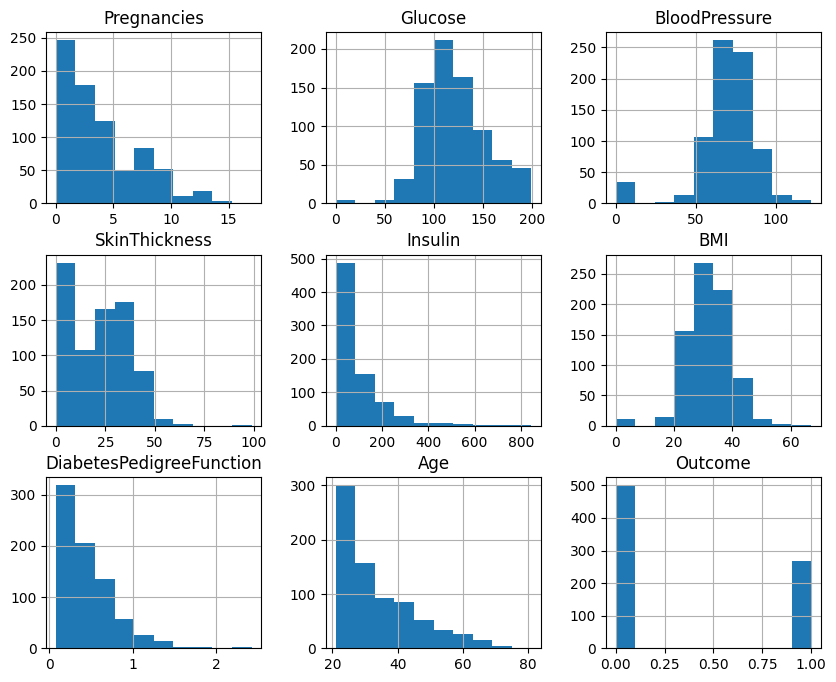

In [66]:
data.hist(figsize=(10, 8))
plt.show()

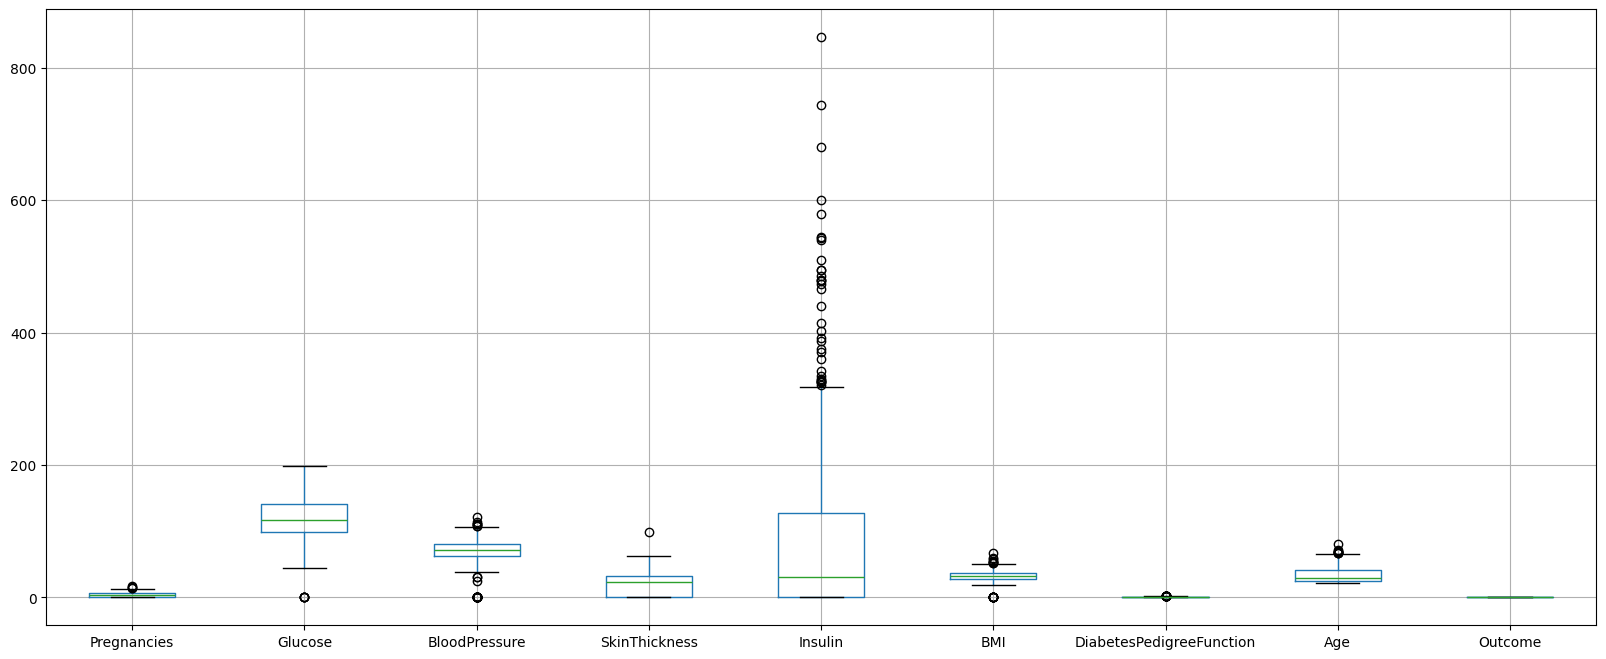

In [67]:
data.boxplot(figsize=(20,8))
plt.show()

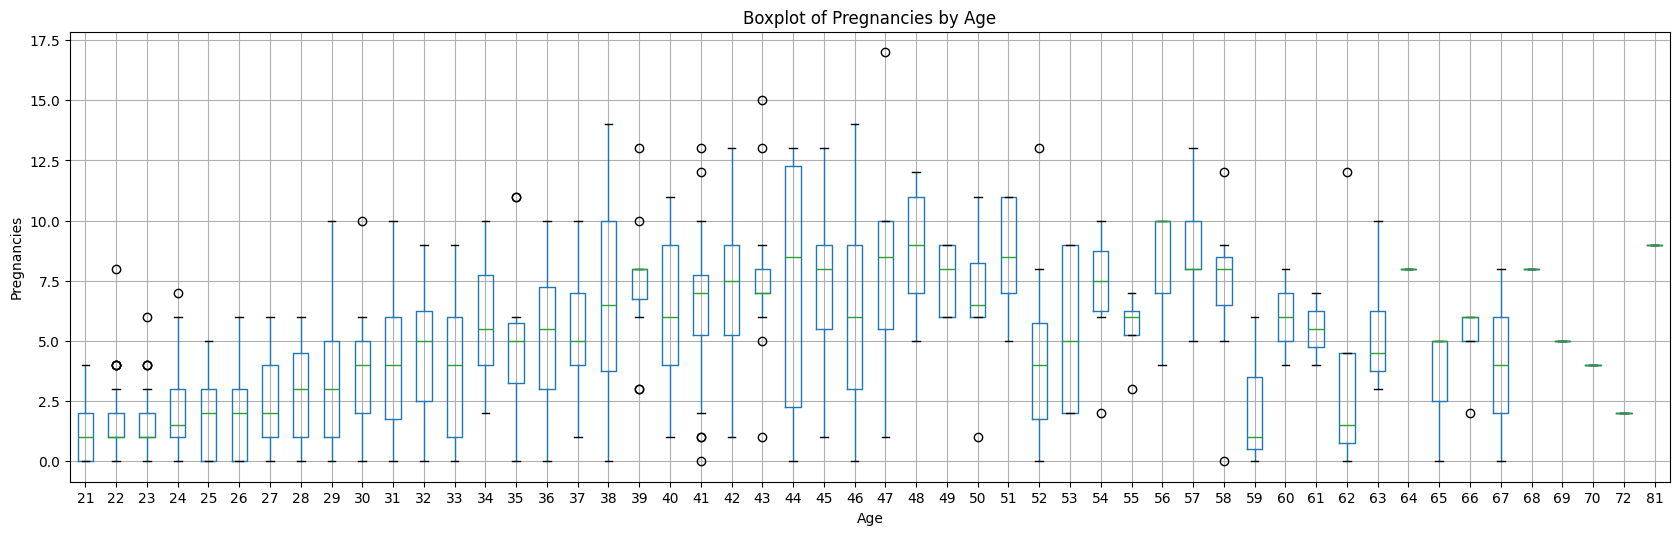

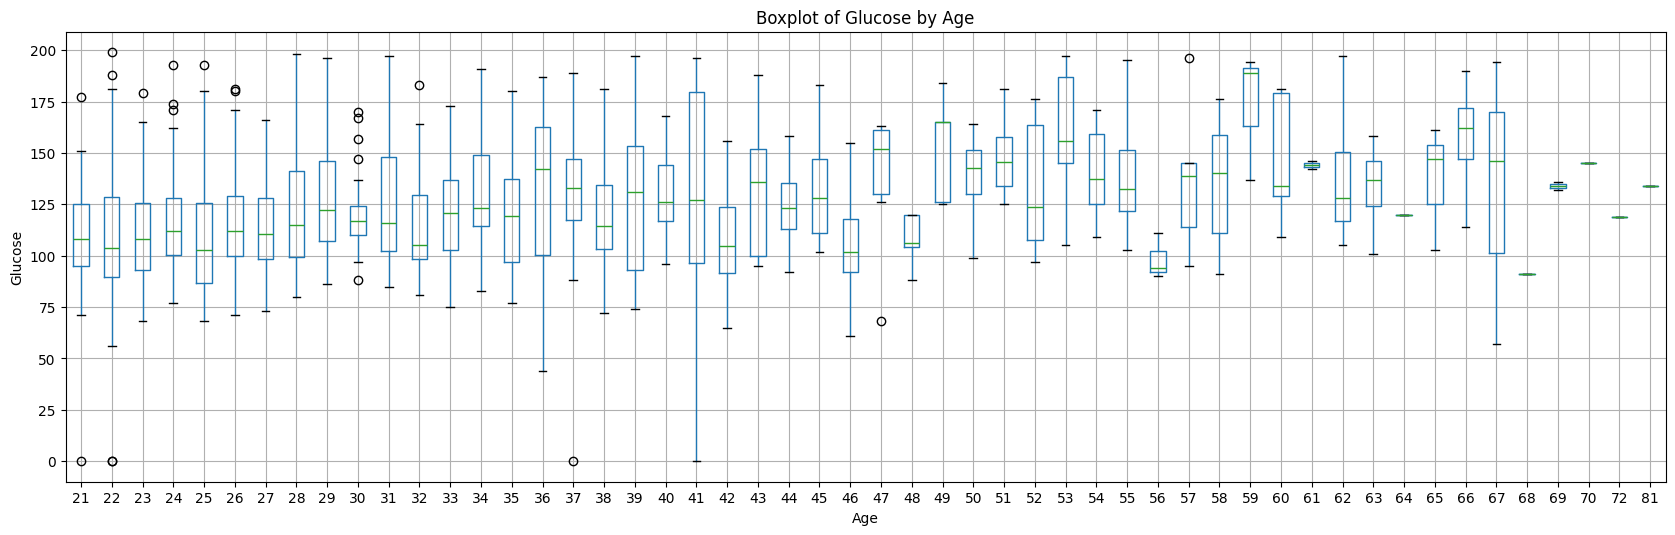

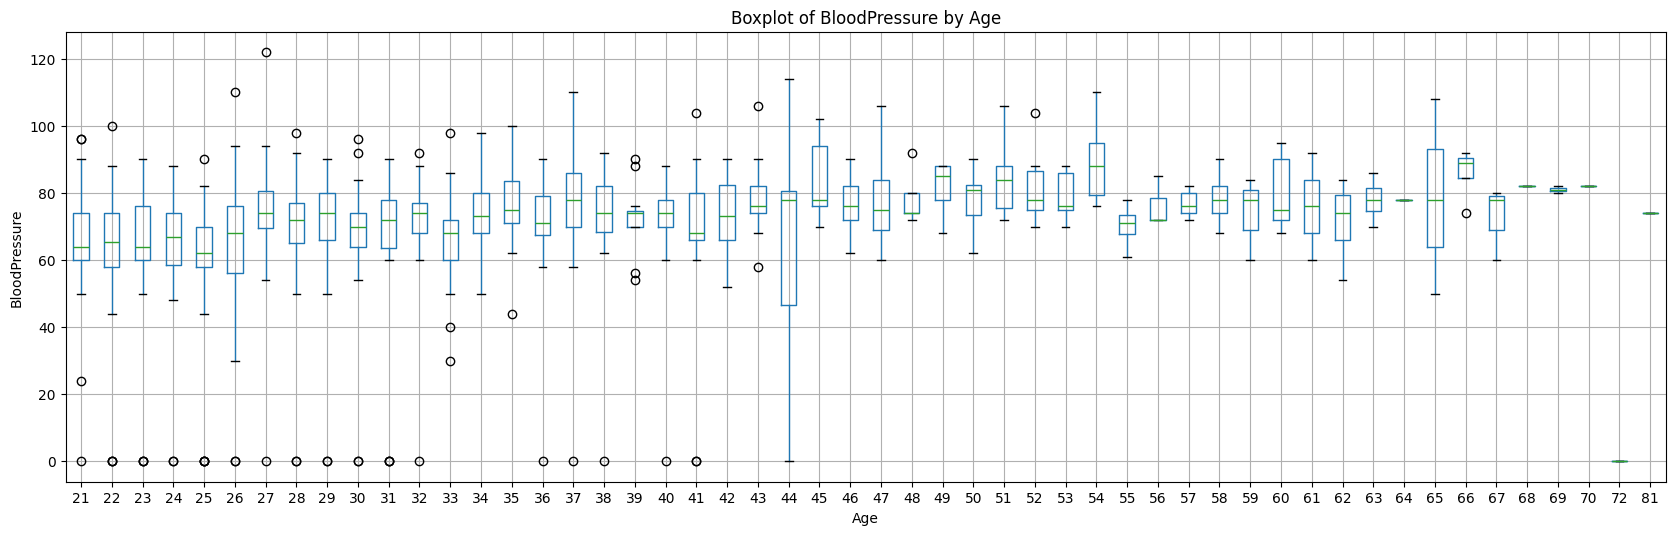

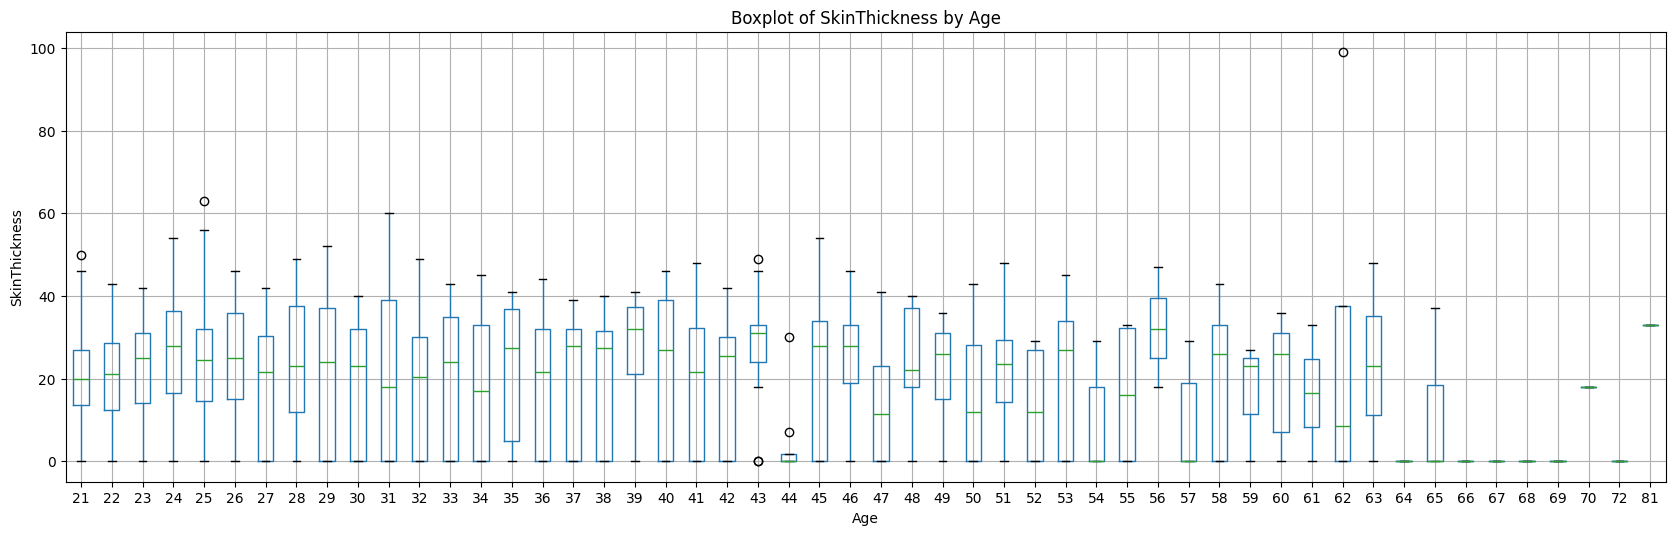

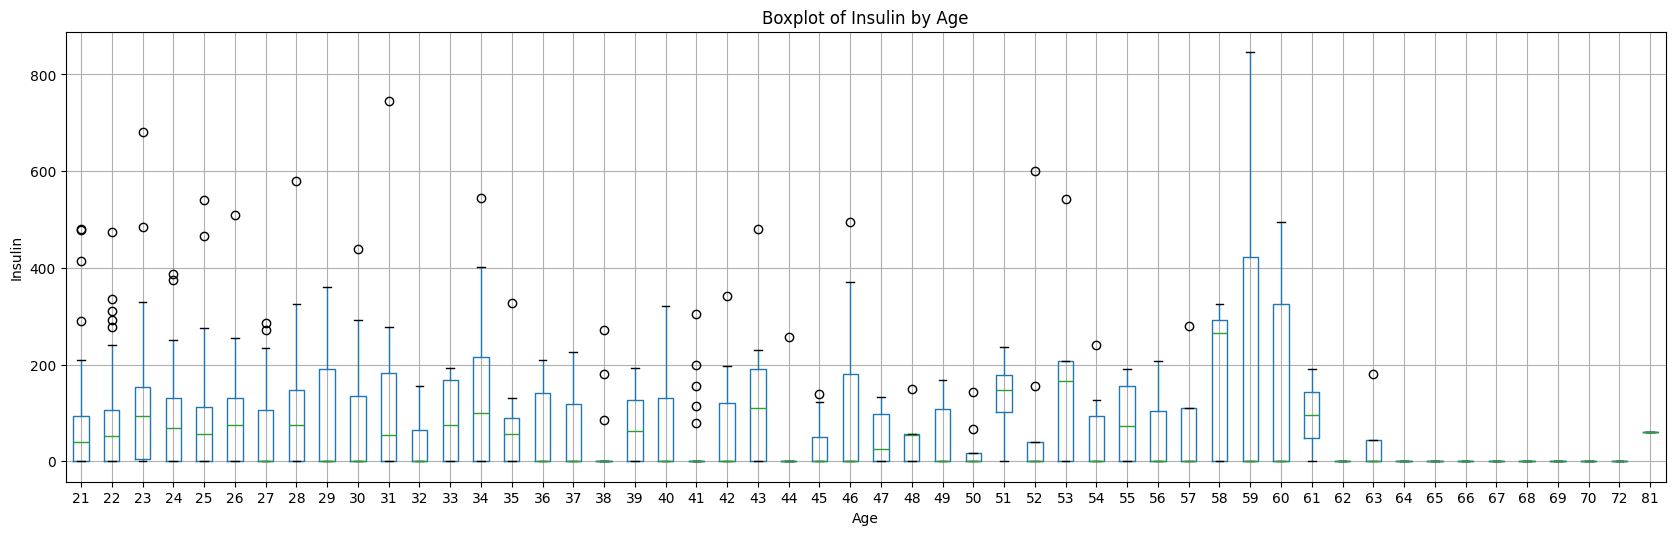

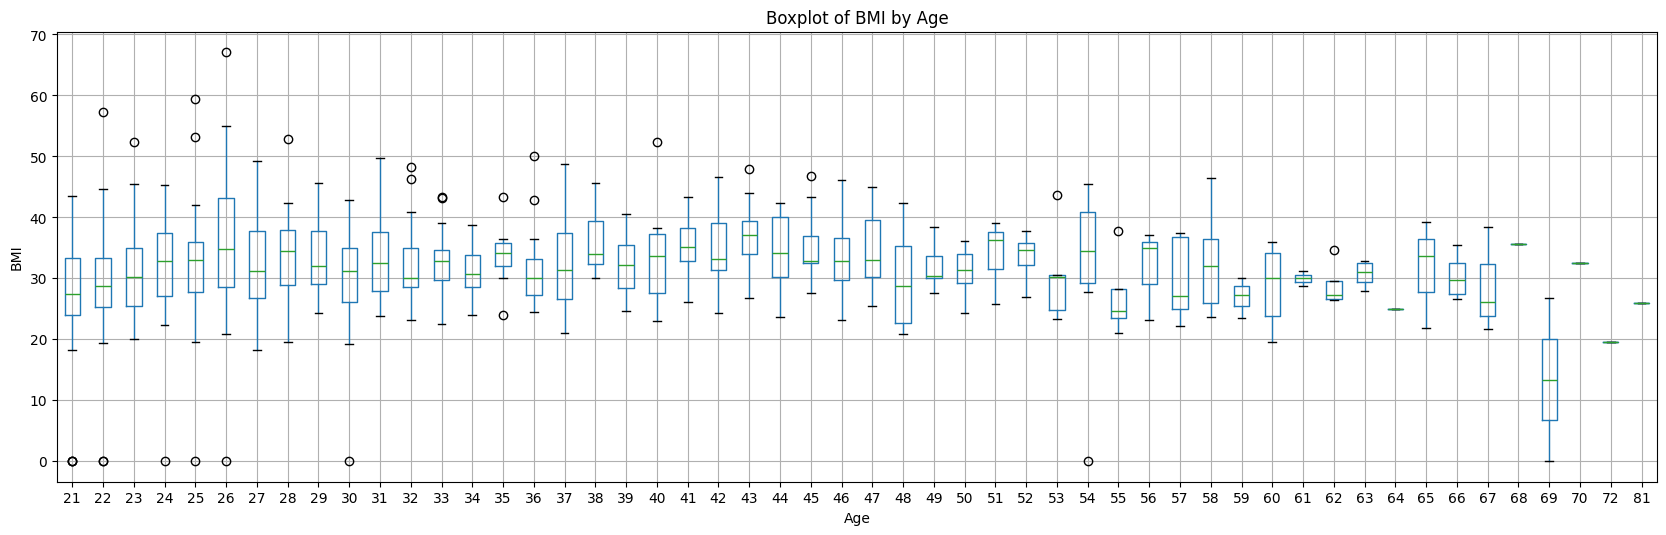

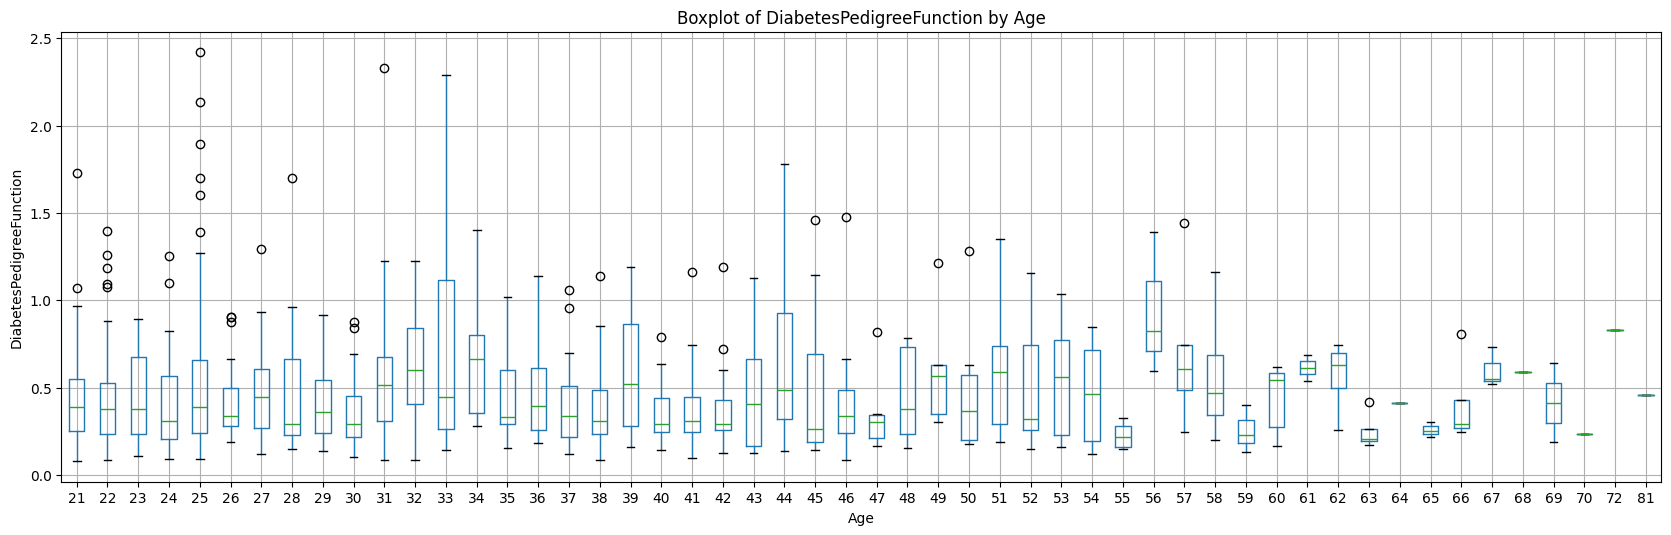

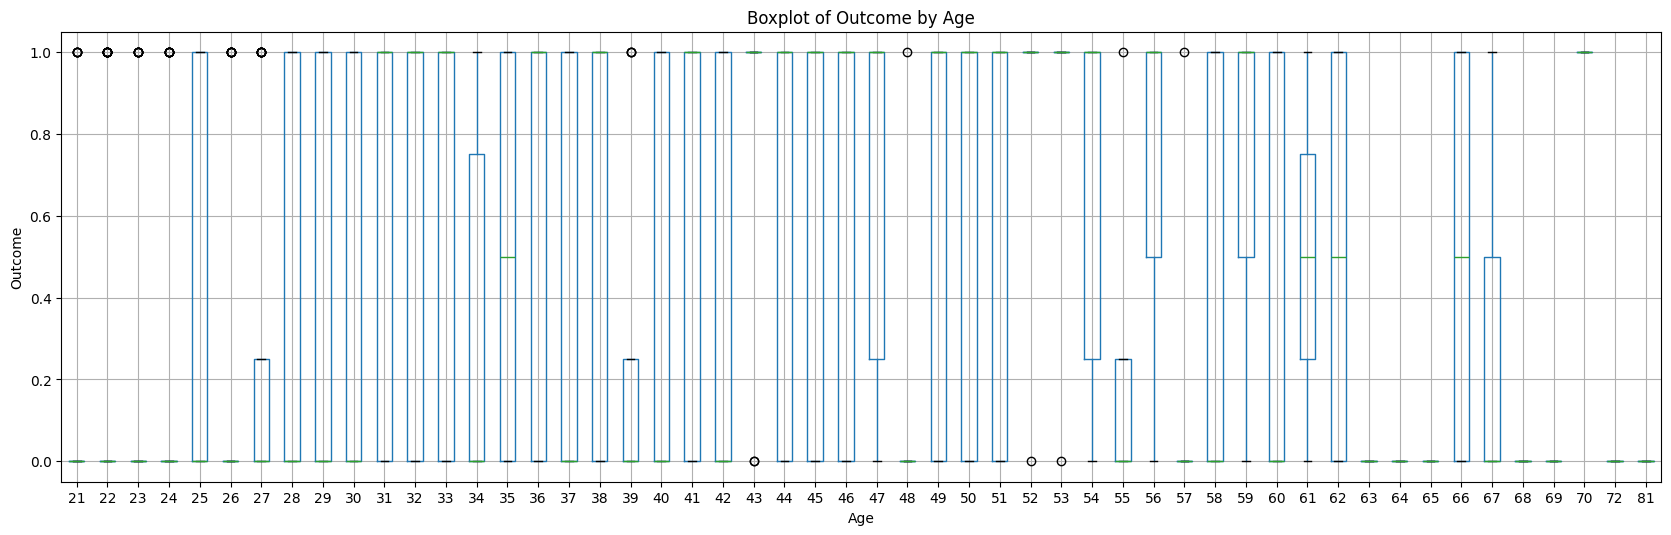

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'data' es tu DataFrame y 'Age' es la columna de referencia
for column in data.columns:
    if column != 'Age':
        data.boxplot(column=column, by='Age', figsize=(20, 6))
        plt.title(f'Boxplot of {column} by Age')
        plt.suptitle('')  # Elimina el título superpuesto
        plt.xlabel('Age')
        plt.ylabel(column)
        plt.show()

# Heatmap

* Spearman -> Cuando hay outliers (Numericas y ordinales)
* Pearson -> Cuando son Numericas y Continuas
* Kendall -> Cuando son Ordinales y Continuas
* Chi-cuadrado para categoricas
* Phi -> Cuando on dicotomicas

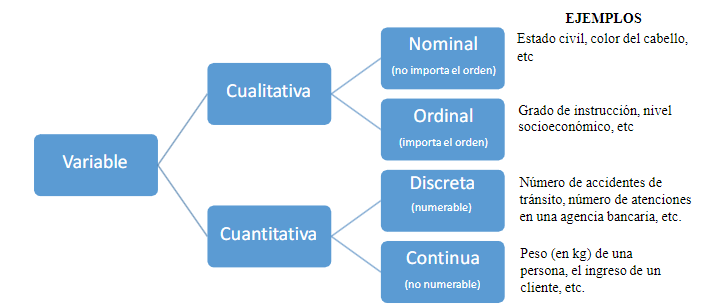

<Axes: >

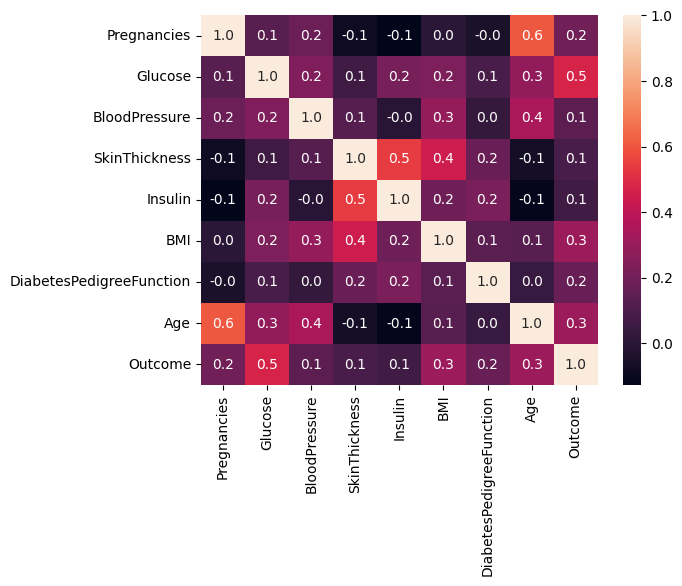

In [69]:
# Calcular la correlación usando Spearman
corr_spearman = data.corr(method='spearman')

# Graficar el heatmap con la correlación de Spearman
sns.heatmap(corr_spearman, annot=True, fmt=".1f")

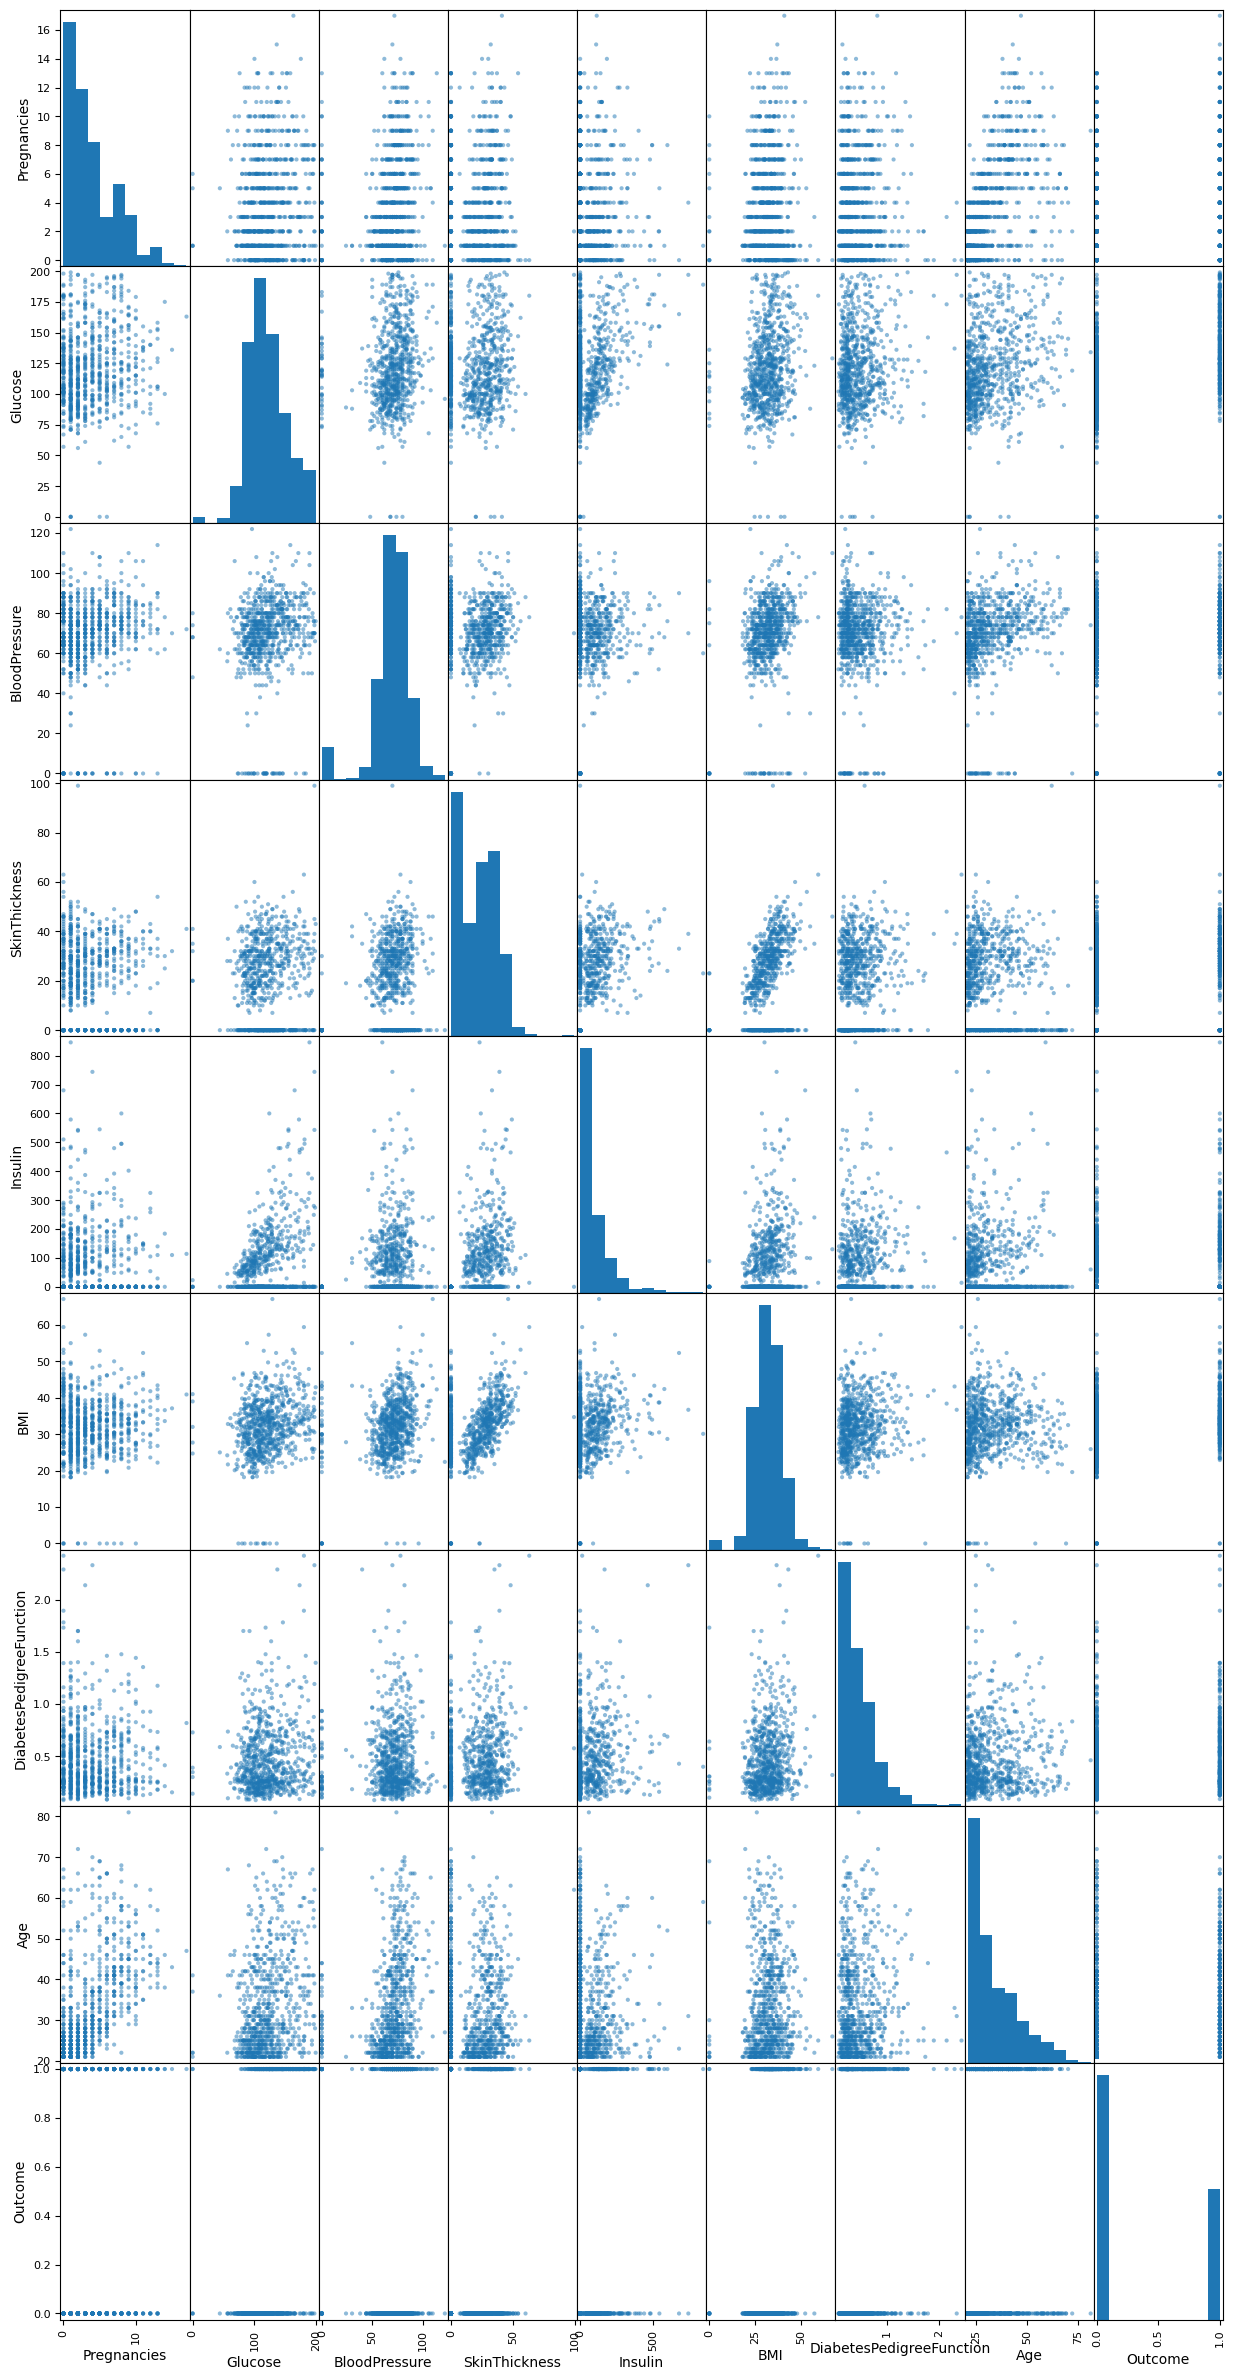

In [70]:
pd.plotting.scatter_matrix(data, figsize=(15,30))
plt.show()

In [71]:
from sklearn.preprocessing import StandardScaler #(Solo para variables numericas)

Es una herramienta quesirve para normalizar o estandarizar las variables numericas de tu conjunto de datos. Este escalado es importante cuando las ariables tienen diferentes escalas o unidades, lo cual puede afectar negatuvamente a ciertos algoritmos de Machine Learning

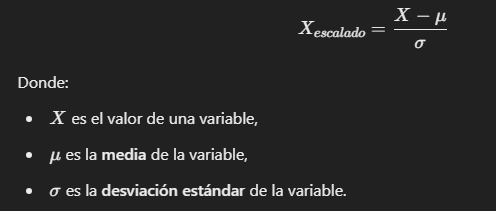

In [72]:
# Seleccionamos todos los atributos del dataset menos la colmuna objetivo
X = data.iloc[:, :-1]
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [73]:
# Seleccionamos los datos de la funcion objetivo
Y = data.iloc[:, -1]
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [74]:
# Estandarizamos las variables predictoras
rescalarX = StandardScaler().fit_transform(X)
dataX = pd.DataFrame(data = rescalarX, columns=X.columns)
dataX.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [75]:
# Clasificacion de Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(dataX, Y, random_state=42, test_size=0.2)

In [77]:
models = []
# Guardamos el modelo de Naive Bayes en models
models.append(("Naive Bayes", GaussianNB()))

In [78]:
models

[('Naive Bayes', GaussianNB())]

### Cross Validation

* KFold: Divide los datos de entrenamiento en varios subconjuntos (en este caso 10) para realizar la validación cruzada.
* cross_val_score: Aplica el modelo a cada subconjunto de datos de entrenamiento y devuelve las puntuaciones (precisión en este caso) para cada partición.
* results[i].mean(): Calcula el promedio de las precisiones obtenidas en las 10 particiones, lo que te da una evaluación más robusta del rendimiento del modelo.

### OJO
Si aumentas n_splits (más particiones):

1. Ventajas:
* Tendrás más particiones para evaluar el modelo, lo que puede proporcionar una evaluación más detallada y, en teoría, más robusta.
* Cada subconjunto de validación será más pequeño, lo que significa que el modelo se entrenará en una mayor proporción de los datos en cada iteración, lo que puede llevar a mejores estimaciones del rendimiento en el entrenamiento.
2. Desventajas:
* Mayor costo computacional: Cuanto más alto sea el número de splits, más veces se entrenará y evaluará el modelo. Si tienes un conjunto de datos grande o un modelo complejo, esto puede aumentar significativamente el tiempo de ejecución.
* Menor tamaño de los subconjuntos de validación: Aumentar el número de splits disminuye el tamaño del conjunto de datos que se utiliza para la validación en cada iteración. Si el conjunto de validación es demasiado pequeño, podría haber mayor variabilidad en las puntuaciones de evaluación, ya que es más probable que los resultados sean influenciados por outliers o ruido en los datos.

In [79]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=20, random_state=42, shuffle=True)
    cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    names.append(name)
    results.append(cv_result)
    for i in range(len(names)):
        print(names[i], results[i].mean())

Naive Bayes 0.7365591397849465


In [80]:
print(results[0])

[0.80645161 0.67741935 0.61290323 0.80645161 0.70967742 0.74193548
 0.74193548 0.77419355 0.74193548 0.70967742 0.70967742 0.64516129
 0.74193548 0.64516129 0.83333333 0.66666667 0.8        0.76666667
 0.8        0.8       ]


C:\Users\magic\AppData\Local\Temp\ipykernel_29844\4194980105.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names)


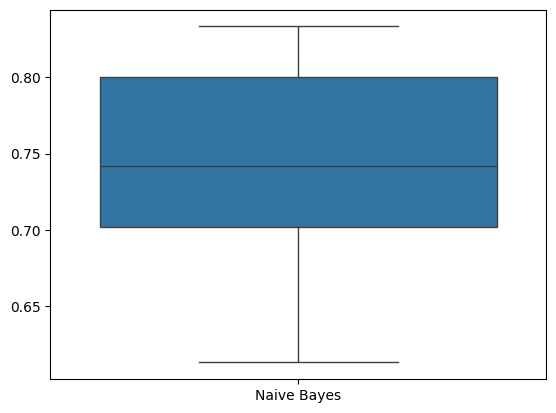

In [81]:
# Visualizacion de resultados
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.show()

In [82]:
# Evaluacion de resultados
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

naive = GaussianNB()
naive.fit(X_train, Y_train)
naive_predictions = naive.predict(X_test)

print("Precision del test: ")
print(accuracy_score(Y_test, naive_predictions))
print(classification_report(Y_test, naive_predictions))

Precision del test: 
0.7662337662337663
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



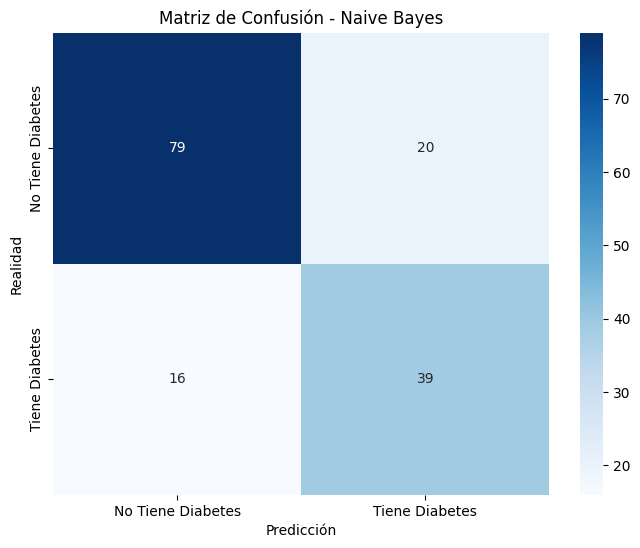

In [84]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcula la matriz de confusión
cm = confusion_matrix(Y_test, naive_predictions)

# Grafica la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tiene Diabetes', 'Tiene Diabetes'], yticklabels=['No Tiene Diabetes', 'Tiene Diabetes'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()


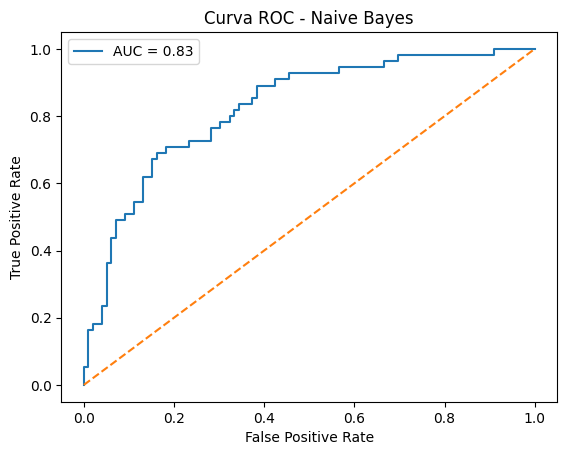

In [85]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create and fit the model
model = GaussianNB()
model.fit(X_train, Y_train)

# Obtiene las probabilidades de la clase positiva (1)
y_prob = model.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calcula el AUC
auc_score = roc_auc_score(Y_test, y_prob)

# Grafica la curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')  # Línea diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Naive Bayes')
plt.legend()
plt.show()